# Analysing the Chinese Grand Prix 2025 F1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import fastf1
import os

# Data caching
cache = 'cache'

if not os.path.exists(cache):
    os.makedirs(cache)
    
fastf1.Cache.enable_cache(cache)

session_quali = fastf1.get_session(2025, 'China', 'Q')
session_quali.load()
session_quali.results

core           INFO 	Loading data for Chinese Grand Prix - Qualifying [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '63', '4', '1', '44', '16', '6', '12', '22', '23', '31', '27', '14', '18', '55', '10', '87', '7', '5', '30']


,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
81,81,O PIASTRI,PIA,piastri,McLaren,FF8000,mclaren,Oscar,Piastri,Oscar Piastri,...,,1.0,,NaN,0 days 00:01:31.591000,0 days 00:01:31.200000,0 days 00:01:30.641000,NaT,,NaN
63,63,G RUSSELL,RUS,russell,Mercedes,27F4D2,mercedes,George,Russell,George Russell,...,,2.0,,NaN,0 days 00:01:31.295000,0 days 00:01:31.307000,0 days 00:01:30.723000,NaT,,NaN
4,4,L NORRIS,NOR,norris,McLaren,FF8000,mclaren,Lando,Norris,Lando Norris,...,,3.0,,NaN,0 days 00:01:30.983000,0 days 00:01:30.787000,0 days 00:01:30.793000,NaT,,NaN
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671C6,red_bull,Max,Verstappen,Max Verstappen,...,,4.0,,NaN,0 days 00:01:31.424000,0 days 00:01:31.142000,0 days 00:01:30.817000,NaT,,NaN
44,44,L HAMILTON,HAM,hamilton,Ferrari,E80020,ferrari,Lewis,Hamilton,Lewis Hamilton,...,,5.0,,NaN,0 days 00:01:31.690000,0 days 00:01:31.501000,0 days 00:01:30.927000,NaT,,NaN
16,16,C LECLERC,LEC,leclerc,Ferrari,E80020,ferrari,Charles,Leclerc,Charles Leclerc,...,,6.0,,NaN,0 days 00:01:31.579000,0 days 00:01:31.450000,0 days 00:01:31.021000,NaT,,NaN
6,6,I HADJAR,HAD,hadjar,Racing Bulls,6692FF,rb,Isack,Hadjar,Isack Hadjar,...,,7.0,,NaN,0 days 00:01:31.162000,0 days 00:01:31.253000,0 days 00:01:31.079000,NaT,,NaN
12,12,K ANTONELLI,ANT,antonelli,Mercedes,27F4D2,mercedes,Andrea Kimi,Antonelli,Andrea Kimi Antonelli,...,,8.0,,NaN,0 days 00:01:31.676000,0 days 00:01:31.590000,0 days 00:01:31.103000,NaT,,NaN
22,22,Y TSUNODA,TSU,tsunoda,Racing Bulls,6692FF,rb,Yuki,Tsunoda,Yuki Tsunoda,...,,9.0,,NaN,0 days 00:01:31.238000,0 days 00:01:31.260000,0 days 00:01:31.638000,NaT,,NaN
23,23,A ALBON,ALB,albon,Williams,64C4FF,williams,Alexander,Albon,Alexander Albon,...,,10.0,,NaN,0 days 00:01:31.503000,0 days 00:01:31.595000,0 days 00:01:31.706000,NaT,,NaN


In [4]:
session_race = fastf1.get_session(2025, 'China', 'R')
session_race.load()
laps = session_race.laps

core           INFO 	Loading data for Chinese Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['81', '4', '63', '1', '31', '12', '23', '87', '18', '55', '6', '30', '7', '5', '27', '22', '14', '16', '44', '10']


In [5]:
laps.info()
laps.head()

<class 'fastf1.core.Laps'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                1065 non-null   timedelta64[ns]
 1   Driver              1065 non-null   object         
 2   DriverNumber        1065 non-null   object         
 3   LapTime             1065 non-null   timedelta64[ns]
 4   LapNumber           1065 non-null   float64        
 5   Stint               1065 non-null   float64        
 6   PitOutTime          26 non-null     timedelta64[ns]
 7   PitInTime           26 non-null     timedelta64[ns]
 8   Sector1Time         1045 non-null   timedelta64[ns]
 9   Sector2Time         1065 non-null   timedelta64[ns]
 10  Sector3Time         1065 non-null   timedelta64[ns]
 11  Sector1SessionTime  1042 non-null   timedelta64[ns]
 12  Sector2SessionTime  1065 non-null   timedelta64[ns]
 13  Sector3SessionTime  1065 non-null   timedelt

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 01:00:41.446000,PIA,81,0 days 00:01:38.344000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:28.932000,...,True,McLaren,0 days 00:59:02.863000,2025-03-23 07:03:38.698,12,1.0,False,,False,False
1,0 days 01:02:18.997000,PIA,81,0 days 00:01:37.551000,2.0,1.0,NaT,NaT,0 days 00:00:26.193000,0 days 00:00:29.261000,...,True,McLaren,0 days 01:00:41.446000,2025-03-23 07:05:17.281,1,1.0,False,,False,True
2,0 days 01:03:56.686000,PIA,81,0 days 00:01:37.689000,3.0,1.0,NaT,NaT,0 days 00:00:26.011000,0 days 00:00:29.486000,...,True,McLaren,0 days 01:02:18.997000,2025-03-23 07:06:54.832,12,1.0,False,,False,True
3,0 days 01:05:34.490000,PIA,81,0 days 00:01:37.804000,4.0,1.0,NaT,NaT,0 days 00:00:26.345000,0 days 00:00:29.430000,...,True,McLaren,0 days 01:03:56.686000,2025-03-23 07:08:32.521,1,1.0,False,,False,True
4,0 days 01:07:12.572000,PIA,81,0 days 00:01:38.082000,5.0,1.0,NaT,NaT,0 days 00:00:26.312000,0 days 00:00:29.729000,...,True,McLaren,0 days 01:05:34.490000,2025-03-23 07:10:10.325,1,1.0,False,,False,True


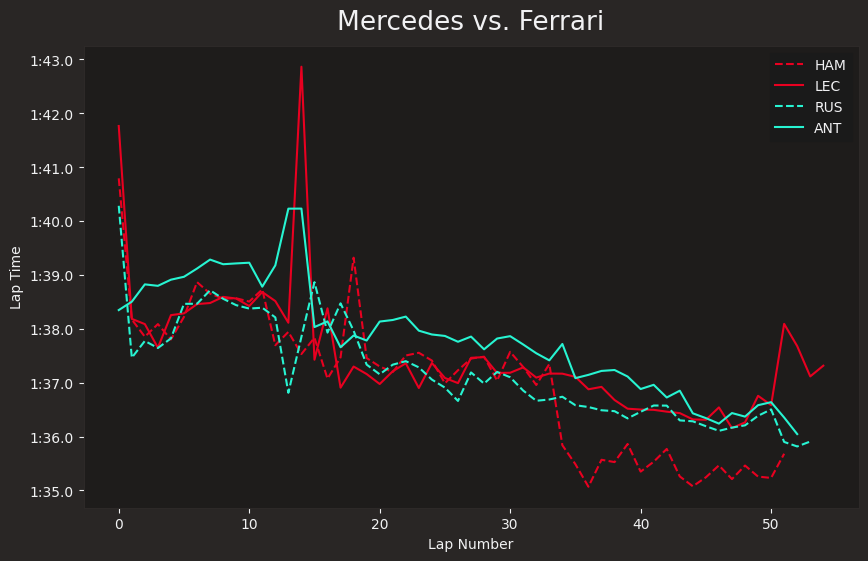

In [13]:
from fastf1 import plotting


fig, ax = plt.subplots(figsize=(10,6))

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')
for driver in ('HAM', 'LEC', 'RUS', 'ANT'):
    laps = session_race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=session_race)
    ax.plot(laps['LapTime'], **style, label=driver)

ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.set_title("Mercedes vs. Ferrari")
ax.legend()
plt.savefig('mercedes_vs_ferrari.png')

In [14]:
session = fastf1.get_session(2025, 'Australia', 'FP1')
session.load(telemetry=True)

# Pick a specific lap (for example, lap 1)
lap = session.laps.pick_driver(driver)

# Get telemetry data for the lap
telemetry = lap.get_telemetry()

print(telemetry.columns)


core           INFO 	Loading data for Australian Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '7', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '44', '55', '63', '81', '87']
c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_

Index(['Date', 'SessionTime', 'DriverAhead', 'DistanceToDriverAhead', 'Time',
       'RPM', 'Speed', 'nGear', 'Throttle', 'Brake', 'DRS', 'Source',
       'Distance', 'RelativeDistance', 'Status', 'X', 'Y', 'Z'],
      dtype='object')
